In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing First Dataset

In [2]:
# using dataset from https://www.kaggle.com/devvret/brazil-real-estate-listings

data = pd.read_csv('./properati_br_2016_11_01_properties_rent-Copy1.csv')

In [3]:
data.head(2)

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat_lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,location
0,2013-04-25,rent,apartment,Praia Grande,|Brasil|São Paulo|Praia Grande|,NaN,NaN,NaN,NaN,900.0,...,NaN,NaN,NaN,1.0,NaN,http://praia-grande-sao-paulo.properati.com.br...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Praia Grande,NaN,NaN
1,2013-04-25,rent,apartment,Alphaville,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN,3200.0,...,NaN,NaN,NaN,3.0,NaN,http://alphaville-barueri.properati.com.br/q8z...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/0/Wjq7toq-DpwK...,NaN


In [4]:
data.shape

(97353, 25)

In [5]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,3.0,46030.000000,46030.000000,92334.000000,92334.000000,92334.000000,15848.000000,75584.000000,70415.000000,70415.000000,5285.000000,58763.000000,3.177300e+04
mean,4164138.0,-22.861939,-46.707036,3935.703554,3928.693581,1228.255667,234.658695,152.538500,16.288983,52.128047,49.528855,2.158161,9.759202e+02
std,0.0,3.585125,2.672557,9325.828330,9197.214373,2875.387441,2444.656264,645.357711,212.996846,681.577383,3043.289924,2.192546,9.845683e+03
min,4164138.0,-33.692432,-97.497955,0.000000,0.000000,0.000000,0.000000,0.000000,0.028084,0.090000,1.000000,1.000000,1.000000e+00
25%,4164138.0,-23.619106,-47.024731,1140.000000,1127.850000,352.610000,0.000000,52.000000,5.200800,16.666667,3.000000,1.000000,3.500000e+02
50%,4164138.0,-23.562963,-46.671908,1900.000000,1918.200000,599.700000,79.000000,80.000000,7.801250,25.000000,6.000000,1.000000,5.560000e+02
75%,4164138.0,-23.030475,-46.567808,3600.000000,3593.240000,1123.380000,180.000000,150.000000,12.482000,40.000000,10.000000,2.000000,9.530000e+02
max,4164138.0,25.860630,-34.813914,470000.000000,353358.360000,110472.820000,200000.000000,75000.000000,28708.730000,92000.000000,221240.000000,40.000000,1.490000e+06


In [6]:
data.isnull().sum()

created_on                        0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
geonames_id                   97350
lat_lon                       51323
lat                           51323
lon                           51323
price                          5019
currency                       5020
price_aprox_local_currency     5019
price_aprox_usd                5019
surface_total_in_m2           81505
surface_covered_in_m2         21769
price_usd_per_m2              26938
price_per_m2                  26938
floor                         92068
rooms                         38590
expenses                      65580
properati_url                     0
description                       0
title                             0
image_thumbnail                5134
location                      51323
dtype: int64

## Creating dataset from observations with geo data.

In [7]:
geo_data = data[data['lat_lon'].isnull() != 1]

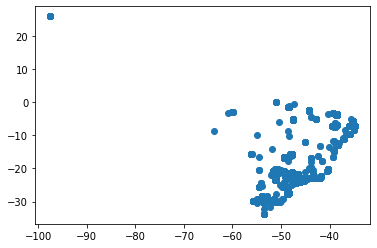

In [8]:
plt.scatter(geo_data['lon'], geo_data['lat'])

### Using CartoPy for Preliminary EDA

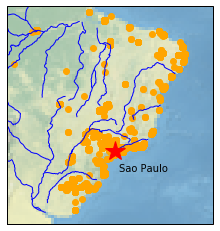

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-65, -30, 1, -36], crs=ccrs.PlateCarree())
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
plt.plot(-46.6333, -23.5505, marker = '*',
        color = 'r', markersize = 20,
       transform=ccrs.Geodetic())
ax.text(-46, -27, 'Sao Paulo', transform=ccrs.Geodetic())

plt.scatter(geo_data['lon'], geo_data['lat'],
         color='orange', marker='o',
         transform=ccrs.Geodetic(),
         )


plt.show()

### Sao Paulo State Geo Data

In [10]:
mask = data.applymap(lambda x: '|São Paulo|' in str(x))

In [11]:
data_sp = data[mask.any(axis=1)]
data_sp.shape

(80936, 25)

In [68]:
geo_data_sp = data_sp[data_sp['lat_lon'].isnull() != 1]

In [69]:
geo_data.to_csv('geo_data_sp.csv', index = False)

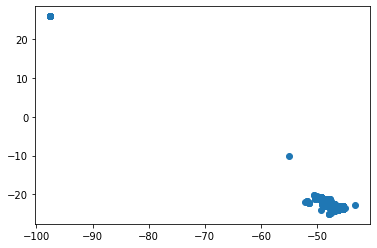

In [70]:
## Looking for Outliers
plt.scatter(geo_data_sp['lon'], geo_data_sp['lat'])

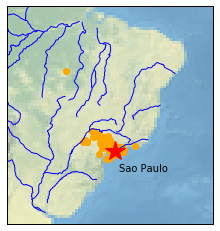

In [71]:
## Test Run. Image too blurry so looked for other options.

rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-65, -30, 1, -36], crs=ccrs.PlateCarree())
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
plt.plot(-46.6333, -23.5505, marker = '*',
        color = 'r', markersize = 20,
       transform=ccrs.Geodetic())
ax.text(-46, -27, 'Sao Paulo', transform=ccrs.Geodetic())

plt.scatter(geo_data_sp['lon'], geo_data_sp['lat'],
         color='orange', marker='o',
         transform=ccrs.Geodetic(),
         )


plt.show()

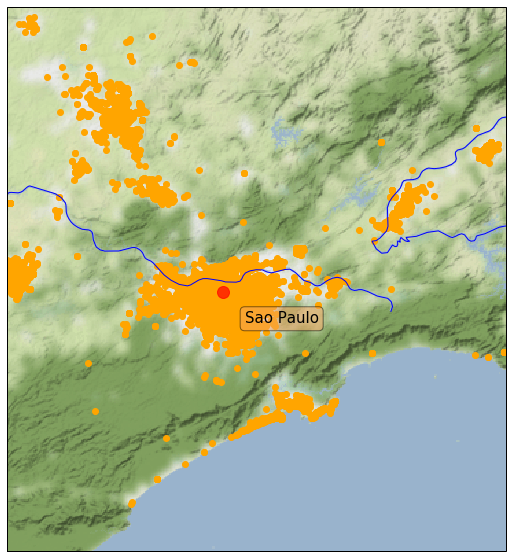

In [67]:
# -*- coding: utf-8 -*-
"""
Map tile acquisition
--------------------

Demonstrates cartopy's ability to draw map tiles which are downloaded on
demand from the Stamen tile server. Internally these tiles are then combined
into a single image and displayed in the cartopy GeoAxes.

"""
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

    # Create a Stamen Terrain instance.
stamen_terrain = cimgt.StamenTerrain()
fig = plt.figure(figsize=(10, 10))


    # Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)
#ax.add_feature(cfeature.STATES.with_scale('10m'))
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

    # Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-47.5, -45.5, -22.5, -24.5])

    # Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 8)


    # Add a marker for the Eyjafjallajökull volcano.
plt.plot(-46.6333, -23.5505, marker='o', color='red', markersize=12,
             alpha=0.7, transform=ccrs.Geodetic())

    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text.
plt.text(-46.15, -23.65, u'Sao Paulo',
             verticalalignment='center', horizontalalignment='right',
             transform=text_transform,
         fontdict={'size': 15},
             bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
plt.scatter(geo_data_sp['lon'], geo_data_sp['lat'],
         color='orange', marker='o',
         transform=ccrs.Geodetic(),
         )

    
plt.show()


#https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

In [72]:
# Could be of use later -- Shows the average rent price per nseighorhood.
#avg_price_neighborhood = data.groupby(by = 'place_name').mean()['price'].sort_values(ascending = False)

Looks like the latitude and longitude are mostly empty. We might have to not use that data and focus on neighborhoods if we use this dataset.

## São Paulo

In [ ]:
data['place_with_parent_names'].value_counts()

In [ ]:
# code found at 
# https://stackoverflow.com/questions/44237170/how-to-search-a-partial-string-in-the-whole-dataframe-using-pandas

mask = data.applymap(lambda x: 'São Paulo|São Paulo' in str(x))

In [ ]:
data1 = data[mask.any(axis=1)]
data1.shape

Of the 97,353 listings in the dataset, 39,191 come from São Paulo, the city (it's also the name of a state, so it's important to specify).

In [ ]:
data1['place_name'].value_counts()

Looks like we have 538 different places in São Paulo.

According to [Wikipedia](#https://en.wikipedia.org/wiki/Subdivisions_of_S%C3%A3o_Paulo), there are 32 boroughs in the city, and a total of 96 districts between them. There may be a number of neighborhoods within each district. This may make mapping difficult.

In [ ]:
data1['property_type'].value_counts()

Most of the listings in Sao Paulo are apartments, with 26,303 listings. There's an almost equal number of stores and houses, with 6649 stores and 6077 houses.

In [ ]:
data1.isnull().sum()

## Rio de Janiero

In [ ]:
mask_rio = mask = data.applymap(lambda x: 'Rio de Janeiro' in str(x))

In [ ]:
data2 = data[mask_rio.any(axis=1)]
data2.shape

Only about 3,603 listings are from Rio de Janiero, which might not be enough data to work with.

## Importing Second Dataset

In [ ]:
# using data for Sāo Paulo from https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

df = pd.read_csv('./sao-paulo-properties-april-2019-Copy1.csv')

In [ ]:
df.shape

It's only 13,640 listings long, which isn't too many, comparitvely.

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

Oh wow, there's no nulls in this data, we can actually use it for longitude and latitude.

In [ ]:
df['Property Type'].value_counts()

Okay, so it's all apartments.

In [ ]:
# removing Sāo Paulo from the end of all the District values

district_split = df["District"].str.split("/", n = 1, expand = True) 
df['District'] = district_split[0]
df['District'].value_counts()

Looks like this dataset has listings from all 36 wards. It doesn't go into detail about the specific neighborhoods, but paired with geolocation data, it may be enough to use.

In [ ]:
df['New'].value_counts()

This is interesting, but may not be useful. Only 213 of the listings in this dataset are new.

The one thing this dataset doesn't include is the date of the listing. I assume these were all available in April 2019, like the Kaggle page suggests. The project guidelines suggested getting years worth of data. Just one month likely isn't enough of a timeframe to be able to correctly find informal settlements. There could just be a lack of listings in particular areas that month.